# Movie Industry Trends

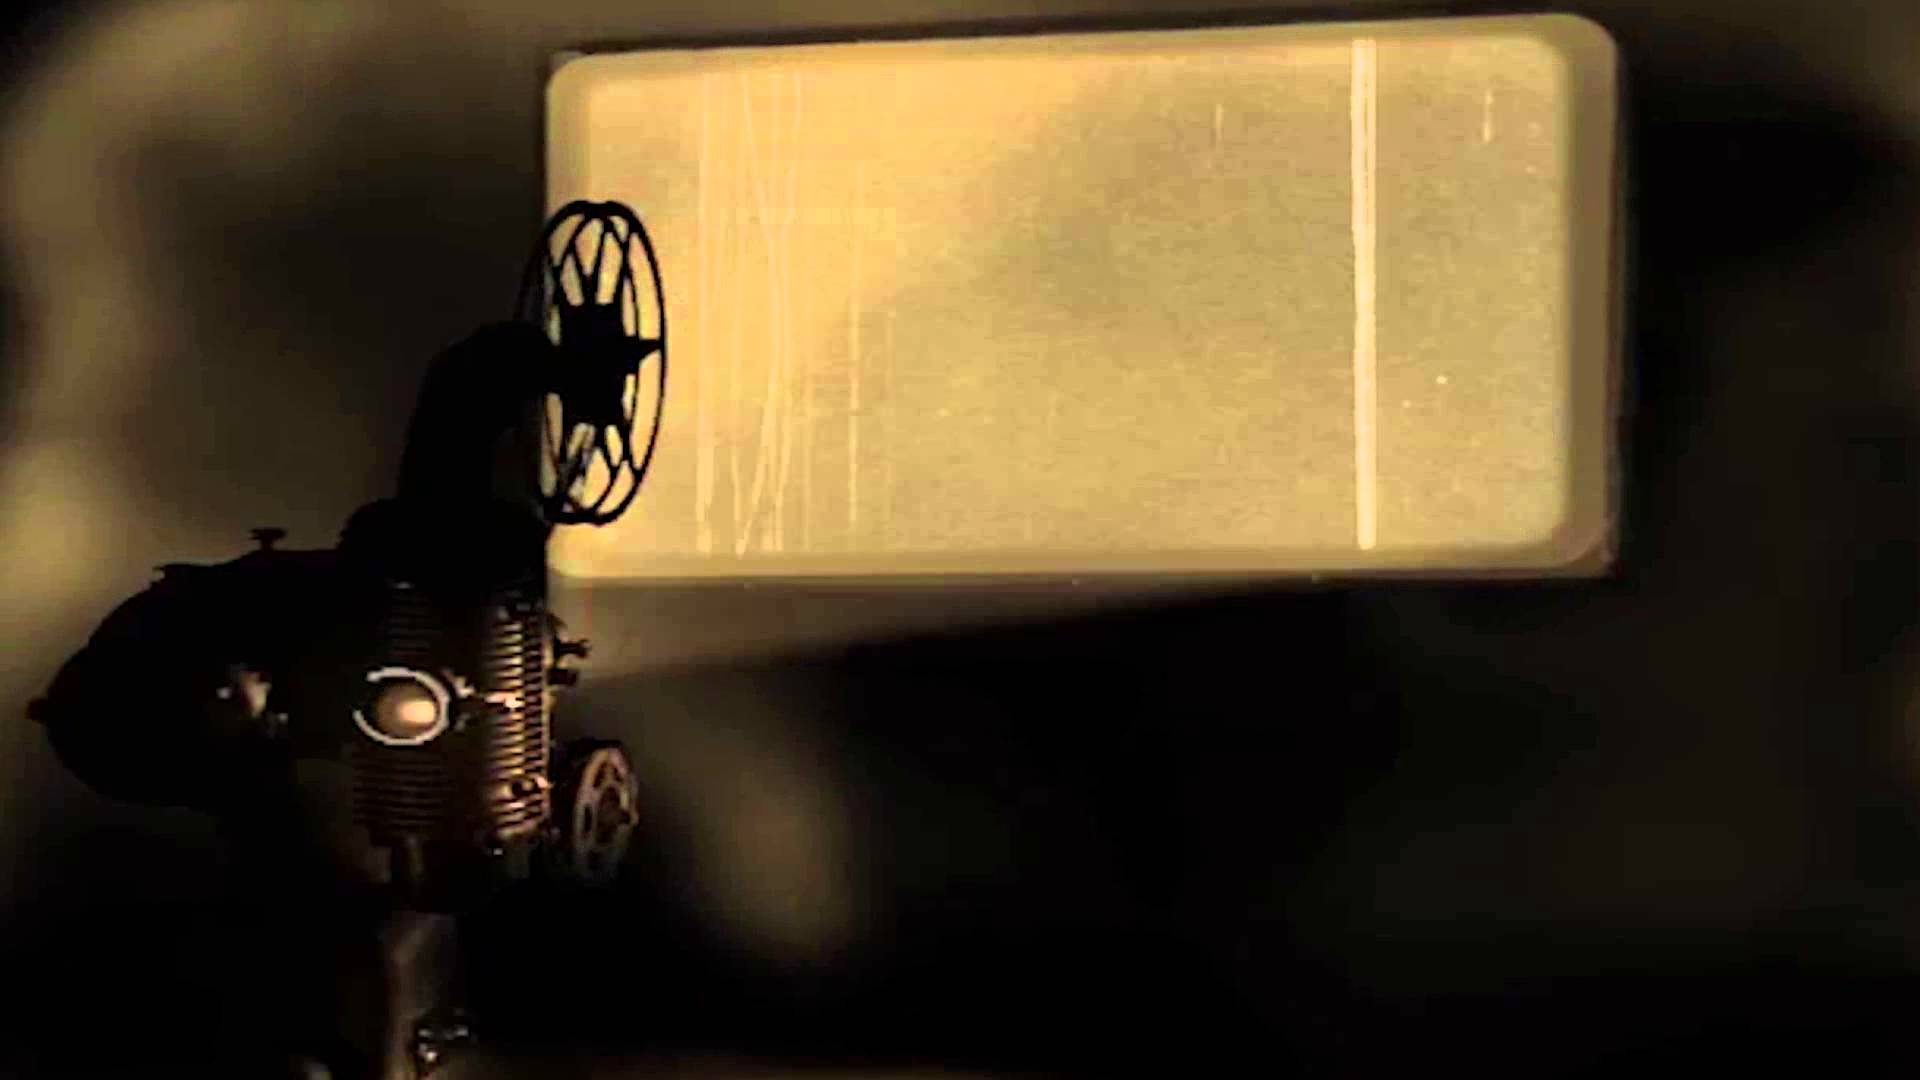

*Sponsored by Microsoft* ;)

**Authors:** [Christos Maglaras](mailto:Christo111M@gmail.com) and [Jamie Dowat](mailto:jamie_dowat44@yahoo.com)

## Overview

In light of Microsoft's desire to expand their enterprise into the movie sector, we have analyzed various aspects of movie data to help develop some insights to help maximize Microsoft's ROI for their potential startup. 

Since we are both relatively unfamiliar with the business end of the industry, supplementary research on the working of the industry as a whole were considered to help drive and focus our analysis. Access sources HERE.

Our insights were from the following categories:
* Budget vs Total Gross 
    * Movies such as **Minions**, **Beauty and the Beast (1991)**, and **Rocky** had the greatest ROI.
* Genre vs Total Gross 
    * The genres that produce (on average the are **Animation, Adventure, and Sci-Fi**.
* Popularity vs Revenue vs Genre
    * **Action** movies are the most frequently correlated to growth in popularity if there is a growth in revenue.
* Movie Runtime
    * For all genres (generally speaking), an optimal run-time is under 120 minutes.
    * More 'serious' genres have a higher runtime limit (before their 'popularity' decreases)
        * For example, Drama films have the highest runtime threshold, at 220 minutes.
        

## Business Understanding

Beginning a new branch of a business is not easy, especially in the entertainment sector. Using existing data from soon to be competitors, Microsoft has an opportunity to jump start their entry into moviemaking that was not available at the time that their competitors built their business. Thankfully Microsoft is one of the leaders of technology worldwide, distribution of the content will be relatively easy as Microsoft's in house Azure servers could be employed. This leads to the possibility of a Microsoft streaming service, which is the route that many competitors have taken. Amazon has Prime Video, Apple has Apple TV+, and Google owns YouTube, which is comparable but not the same class of product. This gives Microsoft a chance to learn from the mistakes of all those preceding it, and to create a product that improves upon all of those points. This notebook's purpose is to provide as much relevant data as is reasonable to aid Microsoft building a business plan towards producing successful movies.

## Unpacking the Data

Data was analyzed from [IMDB](https://www.imdb.com/), [Box Office Mojo](https://www.boxofficemojo.com/), [The Movie Data Base](https://www.themoviedb.org/), [Kaggle](https://www.kaggle.com/rounakbanik/the-movies-dataset?select=movies_metadata.csv) and [The-Numbers.com](https://www.the-numbers.com/).

IMDB, or The International Movie Data Base, is the internets primary source regarding general movie and television data. Since 1990 they have collected data from both professional and public sources, with much of their data being generated from their users activity.

Kaggle is known as one of the most popular websites hosting datasets for use by data scientists, they also create their own content but much of their content is user generated. The main source of data for the Kaggle dataset used in this notebook is IMDB.

Box Office Mojo is an alternate source of data, and was bought by IMDB in 2008.

The Numbers is another alternate source, they aggregate data from the previous sites and more to create datasets of their own.       

In [29]:
import pandas as pd

We adjusted each of the monetary values to accomodate for inflation. [Here](https://github.com/datadesk/cpi#:~:text=Working%20with%20Python,the%20Bureau%20of%20Labor%20Statistics) is the link to the package info.

In [30]:
# if you do not have this cpi package, you can download as:
# pip install cpi (!pip install cpi if you'd like in your Jupyter notebook)

In [31]:
import cpi
cpi.update() # run to make sure current Consumer Price Index is being used in calculations

In [32]:
########## JAMIE CLEANING CODE ###########

In [33]:
bomMovieGross = pd.read_csv('data/bom.movie_gross.csv.gz')

imdbNameBasics = pd.read_csv('data/imdb.name.basics.csv.gz')

imdbTitleAkas = pd.read_csv('data/imdb.title.akas.csv.gz')

imdbTitleBasics = pd.read_csv('data/imdb.title.basics.csv.gz')

imdbTitleCrew = pd.read_csv('data/imdb.title.crew.csv.gz')

imdbTitlePrincipals = pd.read_csv('data/imdb.title.principals.csv.gz')

imdbTitleRatings = pd.read_csv('data/imdb.title.ratings.csv.gz')

rtMovieInfo = pd.read_csv('data/rt.reviews.tsv.gz', sep='\t', encoding='windows-1252')

rtReviews = pd.read_csv('data/rt.reviews.tsv.gz', sep='\t', encoding='windows-1252')

tmdbMovies = pd.read_csv('data/tmdb.movies.csv.gz')

tnMovieBudgets = pd.read_csv('data/tn.movie_budgets.csv.gz')

#### kaggle data csv read here ####



### Cleaning Movie Budget data from [The-Numbers.com](https://www.the-numbers.com/)

In [34]:
tnMovieBudgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


The production budget, domestic gross, and worldwide gross columns need to be converted into numbers:

In [35]:
money_cols = ['worldwide_gross', 'domestic_gross', 'production_budget']
tnMovieBudgets[money_cols] = tnMovieBudgets[money_cols].applymap(lambda x: int(x.replace('$','').replace(',','')))

In [36]:
tnMovieBudgets[money_cols].head(1)

,worldwide_gross,domestic_gross,production_budget
0,2776345279,760507625,425000000


Then, we adjusted the dates to create separate columns for month and year released:

In [37]:
tnMovieBudgets['release_date'] = pd.to_datetime(tnMovieBudgets['release_date'], errors='coerce') # what does coerce do?
tnMovieBudgets['release_date']

tnMovieBudgets['month_released'] = tnMovieBudgets['release_date'].apply(lambda x: str(x))
tnMovieBudgets['month_released'] = tnMovieBudgets['month_released'].apply(lambda x: int(x[5:7]))

tnMovieBudgets['year'] = tnMovieBudgets['release_date'].apply(lambda x: str(x))
tnMovieBudgets['year'] = tnMovieBudgets['year'].apply(lambda x: int(x[:4]))

tnMovieBudgets.drop(labels='release_date', axis=1, inplace=True)

In [38]:
tnMovieBudgets[['month_released', 'year']].head(1)

,month_released,year
0,12,2009


### Cleaning [Box Office Mojo](https://www.boxofficemojo.com/) data

In [39]:
bomMovieGross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [40]:
bomMovieGross['foreign_gross'] = bomMovieGross['foreign_gross'].apply(lambda x: float(str(x).replace(',','')))

### Adjusting tnMovieBudgets and bomMovieGross for inflation

First, we made sure all NaN values were an integer:

In [41]:
bomMovieGross['foreign_gross'].fillna(value=0, inplace=True)



Then, we converted the numbers using **cpi.inflate**:

In [42]:
tnMovieYA = tnMovieBudgets[tnMovieBudgets['year']<2019]

tnMovieBudgets['domestic_adj'] = tnMovieYA.apply(lambda x: cpi.inflate(x.domestic_gross, x.year), axis=1)

tnMovieBudgets['worldwide_adj'] = tnMovieYA.apply(lambda x: cpi.inflate(x.worldwide_gross, x.year), axis=1)

tnMovieBudgets['budget_adj'] = tnMovieYA.apply(lambda x: cpi.inflate(x.production_budget, x.year), axis=1)

In [43]:
bomMovieGross['domestic_adj'] = bomMovieGross.apply(lambda x: cpi.inflate(x.domestic_gross, x.year), axis=1)

bomMovieGross['foreign_adj'] = bomMovieGross.apply(lambda x: cpi.inflate(x.foreign_gross, x.year), axis=1)

To account for data that was NOT adjusted (the CPI does not inflate any data that came after 2018), we filled the NaNs with their original numbers:

In [45]:
tnMovieBudgets['domestic_adj'].fillna(value=tnMovieBudgets['domestic_gross'], inplace=True)
tnMovieBudgets['worldwide_adj'].fillna(value=tnMovieBudgets['worldwide_gross'], inplace=True)

In [49]:
tnMovieBudgets['budget_adj'].fillna(value=tnMovieBudgets['production_budget'], inplace=True)

In [46]:
bomMovieGross['domestic_adj'].fillna(value=bomMovieGross['domestic_gross'], inplace=True)
bomMovieGross['foreign_adj'].fillna(value=bomMovieGross['foreign_gross'], inplace=True)

In [47]:
bomMovieGross.head()

,title,studio,domestic_gross,foreign_gross,year,domestic_adj,foreign_adj
0,Toy Story 3,BV,415000000.0,652000000.0,2010,4.925641e+08,7.738598e+08
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,3.966625e+08,8.205050e+08
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,3.513229e+08,7.884587e+08
3,Inception,WB,292600000.0,535700000.0,2010,3.472874e+08,6.358231e+08
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,2.833134e+08,6.099487e+08


In [50]:
tnMovieBudgets.head()

,id,movie,production_budget,domestic_gross,worldwide_gross,month_released,year,domestic_adj,worldwide_adj,budget_adj
0,1,Avatar,425000000,760507625,2776345279,12,2009,9.174536e+08,3.349300e+09,5.127072e+08
1,2,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,5,2011,2.773640e+08,1.203123e+09,4.724294e+08
2,3,Dark Phoenix,350000000,42762350,149762350,6,2019,4.276235e+07,1.497624e+08,3.500000e+08
3,4,Avengers: Age of Ultron,330600000,459005868,1403013963,5,2015,5.012120e+08,1.532023e+09,3.609991e+08
4,5,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,12,2017,6.548212e+08,1.390266e+09,3.347058e+08


After some cursory analysis, we realized that we wanted to measure averages of domestic and worldwide gross **combined**, so we created a new column, 'total_gross':

In [51]:
tnMovieBudgets['total_gross'] = tnMovieBudgets['worldwide_adj'] + tnMovieBudgets['domestic_adj']

In [52]:
bomMovieGross['total_BOM_gross'] = bomMovieGross['foreign_adj'] + bomMovieGross['domestic_adj']

### Cleaning [The Movie DataBase](https://www.themoviedb.org/) Data

In [54]:
tmdbMovies.head(3)

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368


Drop some unnecessary columns:

In [55]:
dropcols = ['Unnamed: 0', 'original_title', 'original_language']

tmdbMovies.drop(dropcols, axis=1, inplace=True)

### Inspecting [IMDb](https://www.imdb.com/) Data

In [56]:
imdbNameBasics.head(2)

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"


In [57]:
imdbTitleBasics.head(2)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"


In [58]:
imdbTitleBasics.head(2)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"


In [59]:
imdbTitleCrew.head(2)

,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"


In [60]:
imdbTitlePrincipals.head(2)

,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN


In [61]:
imdbTitleRatings.head(2)

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559


In [62]:
imdbTitleAkas.head(2)

,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0


### Merging the data

Since we want to merge across the **'tconst'** column, we have to rename **'title_id'** of imdbTitleAkas:

In [63]:
imdbTitleAkas.rename(mapper={'title_id' : 'tconst'}, axis=1, inplace=True)

First, we are going to merge all of the imdb data together on the column 'tconst':

In [64]:
imdb_dfs = [imdbTitleBasics, imdbTitleAkas, imdbTitleCrew, imdbTitlePrincipals, imdbTitleRatings]

In [65]:
# maybe clean this up later with a for loop?
imdb_master = pd.merge(
                    pd.merge(
                            pd.merge(
                                    pd.merge(
                                        imdb_dfs[0], imdb_dfs[1], on='tconst', how = 'outer'
                                        ), 
                                imdb_dfs[2], on='tconst', how = 'outer'
                                ), 
                        imdb_dfs[3], on='tconst', how = 'outer', suffixes=('_akas', '_princ')
                        ),
                  imdb_dfs[4], on='tconst', how = 'outer')

We found some weird data, so we made sure to get rid of any movies whose 'start_year' was after 2021:

In [67]:
imdb_master.loc[imdb_master['start_year'] > 2021]

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,ordering_akas,title,region,language,...,is_original_title,directors,writers,ordering_princ,nconst,category,job,characters,averagerating,numvotes
64501,tt10042446,Untitled Disney Marvel Film,Untitled Disney Marvel Film,2022,NaN,Action,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65686,tt10064536,Untitled Disney Marvel Film,Untitled Disney Marvel Film,2022,NaN,Action,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
69070,tt10108854,The Hunchback of the Lighthouse,The Hunchback of the Lighthouse,2022,120.0,Drama,NaN,NaN,NaN,NaN,...,NaN,nm5857646,nm5857646,10.0,nm9610047,actress,NaN,"[""Mandy Stone""]",NaN,NaN
69071,tt10108854,The Hunchback of the Lighthouse,The Hunchback of the Lighthouse,2022,120.0,Drama,NaN,NaN,NaN,NaN,...,NaN,nm5857646,nm5857646,1.0,nm5857646,actor,NaN,"[""David""]",NaN,NaN
69072,tt10108854,The Hunchback of the Lighthouse,The Hunchback of the Lighthouse,2022,120.0,Drama,NaN,NaN,NaN,NaN,...,NaN,nm5857646,nm5857646,2.0,nm9207883,actor,NaN,"[""Fletcher""]",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2961076,tt9663764,Aquaman 2,Aquaman 2,2022,NaN,"Action,Sci-Fi",3.0,Aquaman 2,US,NaN,...,0.0,nm1490123,"nm0424901,nm3542504,nm0918816",3.0,nm1490123,director,NaN,NaN,NaN,NaN
2961077,tt9663764,Aquaman 2,Aquaman 2,2022,NaN,"Action,Sci-Fi",3.0,Aquaman 2,US,NaN,...,0.0,nm1490123,"nm0424901,nm3542504,nm0918816",4.0,nm0424901,writer,screenplay,NaN,NaN,NaN
2961078,tt9663764,Aquaman 2,Aquaman 2,2022,NaN,"Action,Sci-Fi",3.0,Aquaman 2,US,NaN,...,0.0,nm1490123,"nm0424901,nm3542504,nm0918816",5.0,nm3542504,writer,Aquaman created by,NaN,NaN,NaN
2961079,tt9663764,Aquaman 2,Aquaman 2,2022,NaN,"Action,Sci-Fi",3.0,Aquaman 2,US,NaN,...,0.0,nm1490123,"nm0424901,nm3542504,nm0918816",6.0,nm0918816,writer,Aquaman created by,NaN,NaN,NaN


In [68]:
imdb_master = imdb_master.loc[imdb_master['start_year'] <= 2021]

We also removed any movie duplicates by their 'tconst' id:

In [69]:
imdb_master.drop_duplicates(subset=['tconst'], inplace=True)

**Merging in tmdbMovies to IMDb_master by 'primary_title':**

Before merging, we had to rename the 'title' column 'primary_title' so we could merge on that column.

In [70]:
tmdbMovies.rename(mapper={'title' : 'primary_title'}, axis=1, inplace=True)

In [71]:
imdb_master = pd.merge(imdb_master, tmdbMovies, on='primary_title', how = 'outer')

**Making IMDB_master with BOM GROSS**

In [73]:
bomMovieGross.rename(mapper={'title' : 'primary_title'}, axis=1, inplace=True)

In [74]:
imdb_BOM = pd.merge(imdb_master, bomMovieGross, on='primary_title', how='outer')

Filled all NaN values with 'Unknown':

In [75]:
imdb_BOM.fillna(value='Unknown', inplace=True)

Looking at the 'genres' column, we need to make the single string into a list of multiple genres:

In [76]:
imdb_BOM['genres'] = imdb_BOM['genres'].apply(
    lambda x: x.split(',') if (',' in x) else ([x] if (x != 'Unknown') else x)
    )

**Making IMDb_master with tnMovieBudgets**

In [77]:
tnMovieBudgets.rename(mapper={'movie' : 'primary_title'}, axis=1, inplace=True)

In [78]:
tnMoviesAdj = tnMovieBudgets[['primary_title', 'month_released', 'year', 'domestic_adj', 'worldwide_adj', 'budget_adj', 'total_gross']]

In [79]:
imdb_master_money = pd.merge(imdb_master, tnMoviesAdj, on='primary_title')

In [80]:
imdb_master_money.fillna(value='Unknown', inplace=True)

In [81]:
imdb_master_money['genres'] = imdb_master_money['genres'].apply(
    lambda x: x.split(',') if (',' in x) else ([x] if (x != 'Unknown') else x)
    )

**Making IMDb_master with BOTH tnMovieBudgets and bomMovieGross**

In [82]:
imdb_BOM_tn = pd.merge(imdb_BOM, tnMoviesAdj, on='primary_title')

In [83]:
imdb_BOM_tn.fillna(value='Unknown', inplace=True)

### Making a list of genres, and a genre dictionary

Upon initial observation of the data, we knew we wanted to see if we could find any patterns related to genre. This required us to create a list of all the unique genres, as well as a **dictionary** whose keys were the genre names, and whose values were the DataFrame with all the movies containing that genre.

In [84]:
genres = []
for movie in imdb_BOM_tn['genres']:
    if type(movie)==list:
        for genre in movie:
            if genre not in genres:
                genres.append(genre)
 

In [85]:
print(genres)

['Action', 'Animation', 'Comedy', 'Adventure', 'Fantasy', 'Mystery', 'Drama', 'Romance', 'Documentary', 'Crime', 'Sci-Fi', 'Family', 'Thriller', 'Horror', 'Biography', 'History', 'News', 'War', 'Sport', 'Music', 'Musical', 'Western', 'Reality-TV']


We created a function called **genre_contained()** that takes in a single genre and a DataFrame, and returns a list of indices that can be used to locate all the movies that contain that genre.

In [87]:
def genre_contained(genre, df):
    index_list = []
    ctr = 0
    for row in df['genres']:
        if type(row) == list:
            for i in row:
                if i == genre:
                    index_list.append(ctr) # should i add continue here          
        ctr += 1
    return index_list

Now, we can update genre_dict with all the info for each genre!

In [88]:
genre_dict = {}

for genre in genres:
    genre_dict[genre] = imdb_master_money.iloc[genre_contained(genre, imdb_master_money)]

We made **2** other dictionaries for imdb_BOM_tn, and imdb_BOM_tn with some additional genre "combos":

In [90]:
genre_dict_2 = {}

for genre in genres:
    genre_dict_2[genre] = imdb_BOM_tn.iloc[genre_contained(genre, imdb_BOM_tn)]

To create the **3rd** genre dictionary, we had to create a function **genre_contained_combos()** which would take in a dataframe and return a dictionary of the additional genres and their respective data.

In [91]:
def genre_contained_combos(df):
    combo_dict = {}
    
    combo_list = [("Romance","Comedy"), ("Animation","Comedy"), ("Adventure","Comedy"), 
                  ("Adventure","Drama"), ("Romance","Drama"), ("Animation", "Drama"), 
                 ("Family", "Comedy"), ("Family", "Drama")]
    
    for k in range(0, len(combo_list)):
        pair_name = combo_list[k][0] + '/' + combo_list[k][1]
        index_list = []
        ctr = 0
        rel_genres = ['Romance', 'Comedy', 'Animation', 'Drama', 'Adventure', 'Family']
        for row in df['genres']:
            if type(row) == list:
                row_pair_keepr = []
                for i in row:
                    #print(row)
                    if i in rel_genres:
                        row_pair_keepr.append(i)
                        if len(row_pair_keepr) == 2:
                            if (row_pair_keepr[0] in combo_list[k]) & (row_pair_keepr[1] in combo_list[k]):
                                index_list.append(ctr)                 
            ctr += 1
        combo_dict[pair_name] = imdb_BOM_tn.iloc[index_list]
        
    return combo_dict

In [92]:
genre_dict_3 = genre_contained_combos(imdb_BOM_tn)
genre_dict_3.update(genre_dict_2)

**Here are some variations of the genre data.**
We found the top 15 genres based on *popularity index* and *the number of movies of that genre*.

In [93]:
# top 15 genres by their frequency in the DataFrame (how many movies classified with this descriptor)
top_15_genres = {i:len(genre_dict_2[i]) for i in genres}
sorted_top_15_genres = sorted(top_15_genres.items(), key=lambda kv: kv[1], reverse=True)[:15]
sorted_top_15_genres

[('Drama', 2621),
 ('Comedy', 1018),
 ('Action', 882),
 ('Documentary', 855),
 ('Thriller', 829),
 ('Adventure', 600),
 ('Horror', 561),
 ('Romance', 510),
 ('Crime', 499),
 ('Biography', 367),
 ('Family', 315),
 ('Mystery', 314),
 ('Sci-Fi', 280),
 ('Fantasy', 262),
 ('Animation', 218)]

In [94]:
# split above tuple list into lists
top_genre_ct_names = [name[0] for name in sorted_top_15_genres]
top_genre_cts = [name[1] for name in sorted_top_15_genres]

In [96]:
top_genres_popularity = {i:genre_dict_2[i]['popularity'][genre_dict_2[i]['popularity']!='Unknown'].mean() for i in genres}

sorted_top_genres_popularity = sorted(top_genres_popularity.items(), key=lambda kv: kv[1], reverse=True)

sorted_top_genres_popularity

[('Adventure', 15.095243856332699),
 ('Sci-Fi', 13.994958847736621),
 ('Fantasy', 13.945504310344825),
 ('Action', 12.811314028314042),
 ('Musical', 12.798750000000002),
 ('Animation', 10.666538071065986),
 ('Crime', 9.799903587443943),
 ('Comedy', 9.517845022624453),
 ('News', 9.405199999999999),
 ('Mystery', 8.935328301886779),
 ('Biography', 8.716847560975598),
 ('Music', 8.05258947368421),
 ('Family', 7.98819850187265),
 ('Thriller', 7.963337001375514),
 ('Horror', 7.702130260521035),
 ('History', 7.682735099337755),
 ('Romance', 7.358340757238301),
 ('Drama', 7.3189532085561835),
 ('Western', 7.16492),
 ('Sport', 6.454721649484536),
 ('Reality-TV', 6.397),
 ('Documentary', 4.741005689900416),
 ('War', 4.409105263157893)]

In [97]:
most_popular_names = [name[0] for name in sorted_top_genres_popularity][:15]
most_popular_avgs = [avg[1] for avg in sorted_top_genres_popularity][:15]

print(most_popular_names)

['Adventure', 'Sci-Fi', 'Fantasy', 'Action', 'Musical', 'Animation', 'Crime', 'Comedy', 'News', 'Mystery', 'Biography', 'Music', 'Family', 'Thriller', 'Horror']


### Cleaning Kaggle Dataset

In [15]:
from datetime import datetime
import ast
import warnings
warnings.filterwarnings("ignore")

These are the csv's that contain the data we manipulated
kaggleMovies is the only self-sourced data, collected from [Kaggle Movie Dataset](https://www.kaggle.com/rounakbanik/the-movies-dataset?select=movies_metadata.csv)

In [16]:
kaggleMovies = pd.read_csv('notebooks/movies_metadata.csv')

This pandas method, pd.set_option() remedies an issue we encounter later on with infinite ratios:

In [17]:
pd.set_option('use_inf_as_na', True)

Starting with the kaggle dataset, we can see that all values are strings, even the interger/float values. Let's fix that for two metrics below.

In [18]:
kaggleMovies['budget'] = pd.to_numeric(kaggleMovies['budget'], errors='coerce')
kaggleMovies['popularity'] = pd.to_numeric(kaggleMovies['popularity'], errors='coerce')

Added a column that represents the return over initial investment here

In [19]:
kaggleMovies['percent returns'] = (kaggleMovies['revenue'] / kaggleMovies['budget'])*100

We see a pair of illegitimate values inhibiting us from converting all to datetime values, I reassign them as nan

In [20]:
kaggleMovies.loc[[19730,29503], ["release_date"]] = np.nan

Here the dates are all converted to datetime objects, errors = 'coerce' forces values such as nan to become datetime objects, instead of failing the process

In [21]:
kaggleMovies['release_date'] = pd.to_datetime(kaggleMovies['release_date'], errors = 'coerce')

Next lets repair the 'genres' column. The issue is that it is a list of dictionaries represented as a string, we will use the ast library to de-string these two columns. 

In [22]:
kaggleMovies['genres'] = list(map(lambda x:ast.literal_eval(x),kaggleMovies['genres']))

There are over 2000 empty lists in 'genres', 

In [23]:
kaggleMovies['genres'] = kaggleMovies['genres'][kaggleMovies['genres'].apply(len)>0]
kaggleMovies.dropna(subset = ['genres'], inplace = True)
kaggleMovies['main_genre'] = list(map(lambda x: x[0]['name'] ,kaggleMovies['genres']))

The 'adult' column only has nine positive values out of over 45k entries, offering us no statistical value. Drop it.

Drop the following columns as well, each is irrelavent to our topic.

In [24]:
kaggleMovies.drop(['adult',
                   'belongs_to_collection',
                   'tagline',
                   'video',
                   'poster_path',
                   'overview',
                   'homepage'], axis = 1, inplace = True)

Drop duplicates of the same movie appearing more than once, using  'imdb_id' leads us to forty eight duplicates to drop.

In [25]:
kaggleMovies.drop_duplicates(subset = 'imdb_id', inplace = True)

Remove all unreleased movies under 'status':

In [26]:
kaggleMovies = kaggleMovies.drop(kaggleMovies['status'][kaggleMovies['status'] != 'Released'].index)

Added year, month, day, day of week, and week columns for use in visualization:

In [27]:
kaggleMovies['year']        = list(map(lambda x: x.year, kaggleMovies['release_date']))
kaggleMovies['month']       = list(map(lambda x: x.month, kaggleMovies['release_date']))
kaggleMovies['day']         = list(map(lambda x: x.day, kaggleMovies['release_date']))

kaggleMovies['day_of_week'] = list(map(lambda x: x.dayofweek, kaggleMovies['release_date']))
kaggleMovies['week']        = list(map(lambda x: x.week, kaggleMovies['release_date']))

Now, time for some *Analysis!!

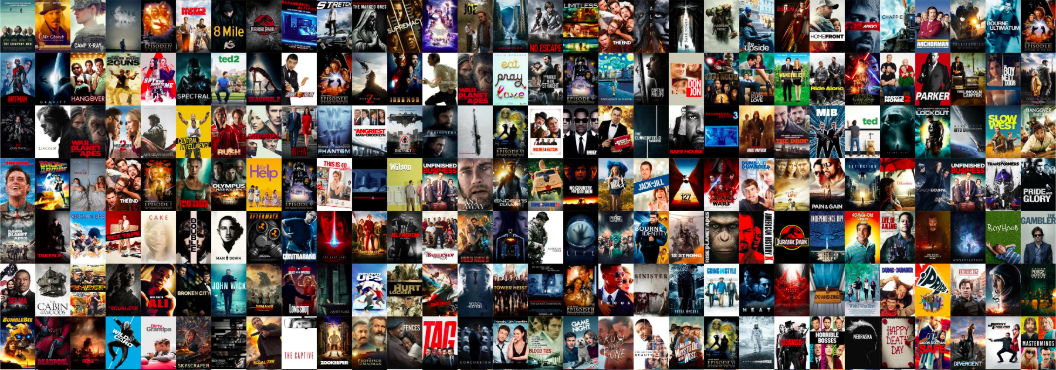



## Analysis

Analysis is split into five sections:
1. Analyzing Budget vs. Total Gross
2. Analyzing Genre type vs. Total Gross
3. Analyzing Release Month vs. Total Gross
4. Analyzing Release Month vs. Total Gross
5. Measuring Correlation between Variables in Kaggle Dataset

In [98]:
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

### 1. Analyzing Budget vs. Total Gross

We wanted to see if there was a strong enough correlation between BUDGET and TOTAL GROSS.

TOTAL GROSS is the sum of DOMESTIC GROSS and WORLDWIDE GROSS.

In [99]:
import seaborn as sns
from scipy import stats

For the y values (total gross values), we found that there were **old** movies (such as the the original release of Snow White in 1937) that were proving to be outliers. We removed those items from the dataset.

In [ ]:
budget_nums = list(imdb_master_money[imdb_master_money['total_gross']<3000000000]['budget_adj'].values)
total_gross_nums = list(imdb_master_money[imdb_master_money['total_gross']<3000000000]['total_gross'].values)

In order to figure out how to calculate the *correlation coefficent*, I had to use some code outlined by a [stack overflow post](https://stackoverflow.com/questions/45902739/seaborn-annotate-the-linear-regression-equation)

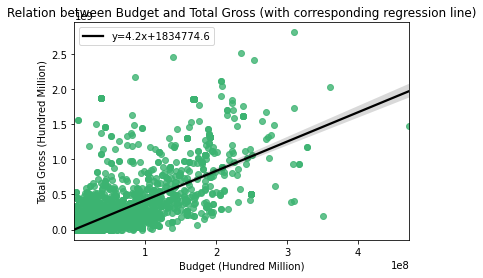

In [102]:
slope, intercept, r_value, p_value, std_err = stats.linregress(budget_nums, total_gross_nums)

ax = sns.regplot(x=budget_nums, y=total_gross_nums, scatter_kws={"color": "mediumseagreen"}, line_kws={"color": "black", "label":"y={0:.1f}x+{1:.1f}".format(slope,intercept)})
ax.set(xlabel="Budget (Hundred Million)", ylabel = "Total Gross (Hundred Million)")
ax.set_title('Relation between Budget and Total Gross (with corresponding regression line)', size=12)

ax.legend()

The **r** value (correlation coefficient) will tell us the strength of the correlation:

In [101]:
r_value

0.725499618332788

*We found the correlation between BUDGET and TOTAL GROSS to be substantial enough to conclude that, given the correlation, one stands to increase their TOTAL GROSS by **4.2x** by choosing to invest **200 million dollars instead of 100 million dollars** in their production budget.*

Bearing this in mind, we decided to investigate the data for a few examples of movies that had the LARGEST ratio of **Total-Gross : Budget** (per every dollar in budget, how many dollars of total gross).

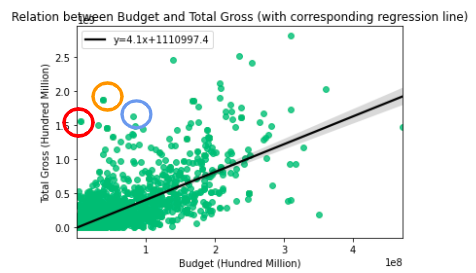

Here is the data for the three *circled* points:

In [110]:
titles = ['Beauty and the Beast', 'Rocky', 'Minions']

imdb_master_money[imdb_master_money['primary_title']==titles[2]]


,tconst,primary_title,original_title,start_year,runtime_minutes,genres,ordering_akas,title,region,language,...,popularity,release_date,vote_average,vote_count,month_released,year,domestic_adj,worldwide_adj,budget_adj,total_gross
3872,tt2293640,Minions,Minions,2015,91,"[Adventure, Animation, Comedy]",10,Suoiuiw,IT,Unknown,...,9.338,2015-07-10,6.4,7343,7,2015,3.669456e+08,1.267030e+09,8.080439e+07,1.633976e+09


In [113]:
blue = imdb_master_money.loc[3913]['primary_title']
blue

'Beauty and the Beast'

In [114]:
red = imdb_master_money.loc[4452]['primary_title']
red

'Rocky'

In [115]:
orange = imdb_master_money.loc[3872]['primary_title']
orange

'Minions'

Here is the Total Gross to Budget Ratio for each movie:

In [116]:
# Beauty and the Beast (1991)
imdb_master_money.loc[3913]['total_gross'] / imdb_master_money.loc[3913]['budget_adj']

49.224419899999994

In [117]:
# Rocky (1976)
imdb_master_money.loc[4452]['total_gross'] / imdb_master_money.loc[4452]['budget_adj']

342.23514700000004

In [118]:
# Minions (2015)
imdb_master_money.loc[3872]['total_gross'] / imdb_master_money.loc[3872]['budget_adj']

20.221377608108106

### 2. Analyzing Genre type vs. Total Gross

Here we were able to clearly see the top 5 genres: **Animation, Adventure, Sci-Fi, Family**

<ipython-input-120-4cbb1a943b25>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(genres, rotation = 45)


Text(0.5, 1.0, 'Average Total Gross per Genre')

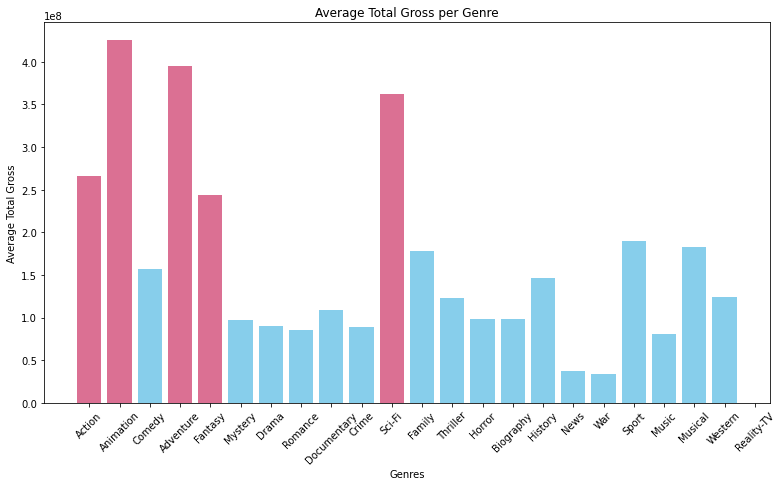

In [120]:
popular_genres, ax = plt.subplots(nrows=1, ncols=1, figsize=(13,7))

total_gross_avgs = [genre_dict_2[i]['total_BOM_gross'][genre_dict_2[i]['total_BOM_gross']!='Unknown'].mean() 
                 for i in genres]
lc = [0,1,3,4,10]
color_list = ['palevioletred' if i in lc else 'skyblue' for i in range(0,len(genres))]

ax.bar(genres, total_gross_avgs, color=color_list)

ax.set_xlabel('Genres')
ax.set_ylabel('Average Total Gross')

ax.set_xticklabels(genres, rotation = 45)

ax.set_title('Average Total Gross per Genre')


### 3. Analyzing Release Year vs. Total Gross (for Top 5 Genres)

Now that we have the top 5 genres, we looked to see if there were any notable yearly trends:

Text(0.5, 1.0, 'Average Total Gross for the TOP 5 Genres between 2010-2018')

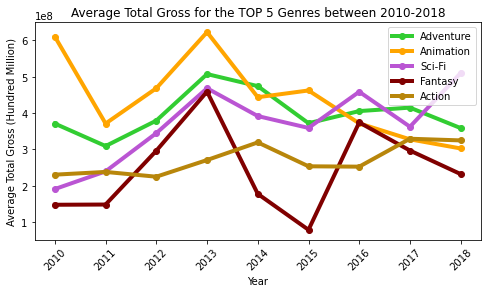

In [127]:
year_tix = sorted(list(imdb_BOM_tn['year_y'][(imdb_BOM_tn['year_y']>2009) & (imdb_BOM_tn['year_y']<2019)].value_counts().index))

adventure = [genre_dict_3['Adventure'][(genre_dict_3['Adventure']['year_y']==i)&(genre_dict_3['Adventure']['total_BOM_gross']!='Unknown')]['total_BOM_gross'].mean() for i in year_tix]
animation = [genre_dict_3['Animation'][(genre_dict_3['Animation']['year_y']==i)&(genre_dict_3['Animation']['total_BOM_gross']!='Unknown')]['total_BOM_gross'].mean() for i in year_tix]
scifi = [genre_dict_3['Sci-Fi'][(genre_dict_3['Sci-Fi']['year_y']==i)&(genre_dict_3['Sci-Fi']['total_BOM_gross']!='Unknown')]['total_BOM_gross'].mean() for i in year_tix]
fantasy = [genre_dict_3['Fantasy'][(genre_dict_3['Fantasy']['year_y']==i)&(genre_dict_3['Fantasy']['total_BOM_gross']!='Unknown')]['total_BOM_gross'].mean() for i in year_tix]
action = [genre_dict_3['Action'][(genre_dict_3['Action']['year_y']==i)&(genre_dict_3['Action']['total_BOM_gross']!='Unknown')]['total_BOM_gross'].mean() for i in year_tix]

plt.figure(figsize=(8,4))

plt.plot( year_tix, adventure, marker='o', markerfacecolor='limegreen', markersize=6, color='limegreen', label='Adventure', linewidth=4)
plt.plot( year_tix, animation, marker='o', markerfacecolor='orange', markersize=6, color='orange', label='Animation', linewidth=4)
plt.plot( year_tix, scifi, marker='o', markerfacecolor='mediumorchid', markersize=6, color='mediumorchid', label='Sci-Fi', linewidth=4)
plt.plot( year_tix, fantasy, marker='o', markerfacecolor='maroon', markersize=6, color='maroon', label='Fantasy', linewidth=4)
plt.plot( year_tix, action, marker='o', markerfacecolor='darkgoldenrod', markersize=6, color='darkgoldenrod', label='Action', linewidth=4)

plt.xticks(year_tix, year_tix, rotation=45)

plt.xlabel('Year')
plt.ylabel('Average Total Gross (Hundred Million)')
plt.legend()

plt.title('Average Total Gross for the TOP 5 Genres between 2010-2018')

**Takeaways:**
* Since the graph is only showing an 8 year range, we didn't want to draw any conclusions or make any recommendations based on yearly total gross.
* We found it beneficial to hone in on 2 key points in the graph: Total Gross for SCI-FI in 2013 (after a significant growth period) *and* Total Gross for ANIMATION in 2013 (largest point in 2013). 
* After examining the data for Sci-Fi and Animation in 2013, we thought it would be beneficial for Microsoft to be aware of the "best" movies in terms of total gross to budget ratio.

In [131]:
df_animation = genre_dict['Animation'][(genre_dict['Animation']['year']==2013)&(genre_dict['Animation']['total_gross']>600000000)]
df_animation

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,ordering_akas,title,region,language,...,popularity,release_date,vote_average,vote_count,month_released,year,domestic_adj,worldwide_adj,budget_adj,total_gross
75,tt0481499,The Croods,The Croods,2013,98,"[Action, Adventure, Animation]",10,Crood Awakening,US,Unknown,...,16.29,2013-03-22,6.8,3873,3,2013,2.079407e+08,6.366686e+08,1.499826e+08,8.446093e+08
1134,tt2294629,Frozen,Frozen,2013,102,"[Adventure, Animation, Comedy]",10,Frost,SE,Unknown,...,9.678,2010-02-05,5.8,987,11,2013,4.452127e+08,1.413691e+09,1.666473e+08,1.858904e+09
1135,tt2294629,Frozen,Frozen,2013,102,"[Adventure, Animation, Comedy]",10,Frost,SE,Unknown,...,26.183,2013-11-27,7.3,9767,11,2013,4.452127e+08,1.413691e+09,1.666473e+08,1.858904e+09
1434,tt1453405,Monsters University,Monsters University,2013,104,"[Adventure, Animation, Comedy]",10,Sevimli Canavarlar Üniversitesi,TR,tr,...,20.33,2013-06-21,7,6362,6,2013,2.982857e+08,8.261131e+08,2.221964e+08,1.124399e+09
2183,tt1690953,Despicable Me 2,Despicable Me 2,2013,98,"[Adventure, Animation, Comedy]",10,Ke Trôm Mat Trang 2,VN,Unknown,...,19.014,2013-07-03,6.9,7319,7,2013,4.089140e+08,1.083448e+09,8.443462e+07,1.492362e+09


Despite the theoretical possibility of a more pythonic way to accomplish this, we used the indices shown in the above dataframe to locate the movie and calculate its ratio.

In [133]:
# The Croods
df_animation.loc[75]['total_gross'] / df_animation.loc[75]['budget_adj']

5.631384074074073

In [134]:
# Frozen
df_animation.loc[1134]['total_gross'] / df_animation.loc[1134]['budget_adj']

11.154719459999997

In [135]:
# Monsters University
df_animation.loc[1434]['total_gross'] / df_animation.loc[1434]['budget_adj']

5.060383290000001

In [136]:
# Despicable Me 2
df_animation.loc[2183]['total_gross'] / df_animation.loc[2183]['budget_adj']

17.674766052631576

From the above, we concluded and emphasized the fact that the Animated movie with the HIGHEST ratio is **Despicable Me 2**, with an *18 : 1* ratio.

This is interesting compared to the 2nd largest average gross for Animation, which was 2010, the release year of **Despicable Me**, which has an *11 : 1* ratio.

### 4. Analyzing Release Month vs. Total Gross

After doing some [research](), we found that **release strategies** are a significant part of movie company decision making. We decided to corral the data in that direction to see if there were some helpful suggestions for which **month** is most/least optimal to release a film.

Text(0, 0.5, 'Average Total Gross (Billions)')

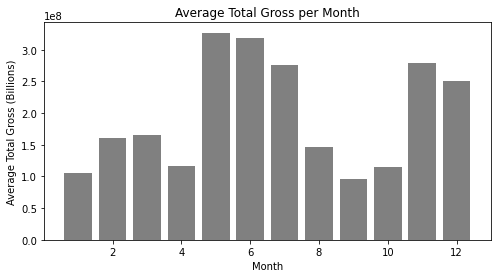

In [148]:
month_avg, ax = plt.subplots(ncols=1, figsize=(8,4))

# x and y values
months = [sorted(tnMovieBudgets['month_released'].value_counts().index)[i] 
     for i in range(0, len(tnMovieBudgets['month_released'].value_counts().index))]
mean_total_grosses = [tnMovieBudgets[tnMovieBudgets['month_released']==i]['total_gross'].mean() for i in range(1,13)]

ax.bar(months, mean_total_grosses, color='grey')   
ax.set_title('Average Total Gross per Month')
ax.set_xlabel('Month')
ax.set_ylabel('Average Total Gross (Billions)')


To confirm this pattern of Average Gross per month, we looked to see if the same pattern would occur when calculating the Average Gross by **genre**:

In [140]:
import numpy as np

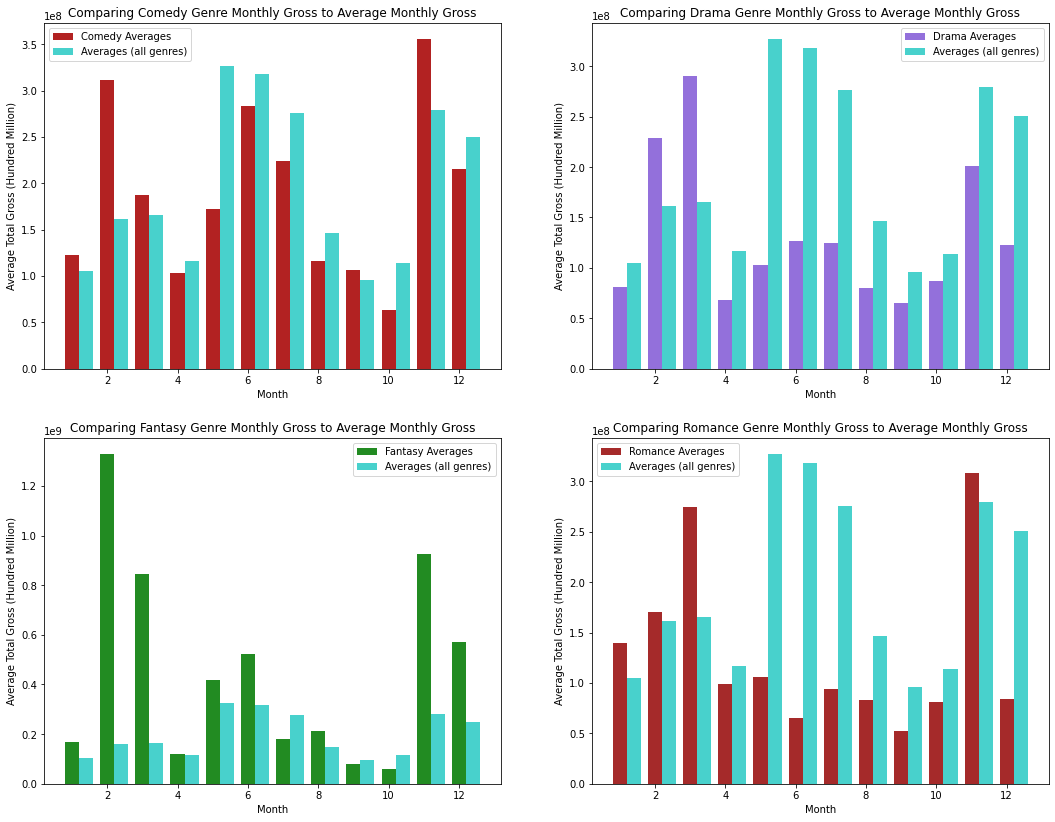

In [147]:
# FIG 
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(18,14))
months = list(range(1,13))

# Comedy and avg COMPARE

total_gross_avgs_comedy = [genre_dict['Comedy']['total_gross'][
    (genre_dict['Comedy']['month_released']==i)&(genre_dict['Comedy']['total_gross']!='Unknown')].mean() for i in months
    ]

w = 0.4
bar1 = months
bar2 = [i+w for i in bar1]

ax[0][0].bar(bar1, total_gross_avgs_comedy, width=w, color='firebrick', label='Comedy Averages', align='center')
ax[0][0].bar(bar2, mean_total_grosses, width=w, color='mediumturquoise', label='Averages (all genres)', align='center')

# x and y vals; use bottom parameter to make stacked
ax[0][0].set_xlabel('Month')
ax[0][0].set_ylabel('Average Total Gross (Hundred Million)')
ax[0][0].set_title('Comparing Comedy Genre Monthly Gross to Average Monthly Gross')
ax[0][0].legend()

#################

# Drama and avg COMPARE

total_gross_avgs_drama = [genre_dict['Drama']['total_gross'][
    (genre_dict['Drama']['month_released']==i)&(genre_dict['Drama']['total_gross']!='Unknown')].mean() for i in months
    ]

w = 0.4
bar1 = months
bar2 = [i+w for i in bar1]

ax[0][1].bar(bar1, total_gross_avgs_drama, width=w, color='mediumpurple', label='Drama Averages', align='center')
ax[0][1].bar(bar2, mean_total_grosses, width=w, color='mediumturquoise', label='Averages (all genres)', align='center')

ax[0][1].set_xlabel('Month')
ax[0][1].set_ylabel('Average Total Gross (Hundred Million)')
ax[0][1].set_title('Comparing Drama Genre Monthly Gross to Average Monthly Gross')
ax[0][1].legend()

##################

# Fantasy and avg COMPARE

total_gross_avgs_fantasy = [genre_dict['Fantasy']['total_gross'][
    (genre_dict['Fantasy']['month_released']==i)&(genre_dict['Fantasy']['total_gross']!='Unknown')].mean() for i in months
    ]

w = 0.4
bar1 = months
bar2 = [i+w for i in bar1]

ax[1][0].bar(bar1, total_gross_avgs_fantasy, width=w, color='forestgreen', label='Fantasy Averages', align='center')
ax[1][0].bar(bar2, mean_total_grosses, width=w, color='mediumturquoise', label='Averages (all genres)', align='center')

ax[1][0].set_xlabel('Month')
ax[1][0].set_ylabel('Average Total Gross (Hundred Million)')
ax[1][0].set_title('Comparing Fantasy Genre Monthly Gross to Average Monthly Gross')
ax[1][0].legend()

###################

# Romance and avg COMPARE

total_gross_avgs_romance = [genre_dict['Romance']['total_gross'][
    (genre_dict['Romance']['month_released']==i)&(genre_dict['Romance']['total_gross']!='Unknown')].mean() for i in months
    ]

w = 0.4
bar1 = months
bar2 = [i+w for i in bar1]

ax[1][1].bar(bar1, total_gross_avgs_romance, width=w, color='brown', label='Romance Averages', align='center')
ax[1][1].bar(bar2, mean_total_grosses, width=w, color='mediumturquoise', label='Averages (all genres)', align='center')

ax[1][1].set_xlabel('Month')
ax[1][1].set_ylabel('Average Total Gross (Hundred Million)')
ax[1][1].set_title('Comparing Romance Genre Monthly Gross to Average Monthly Gross')
ax[1][1].legend()

**Takeaways:**
* MAY is the month with the largest Average Total Gross
* The summer months (May, June, July) average significantly higher than other seasons.
* When dissecting the averages into different genres, none of the above genres conformed to this trend, with higher Total Grosses during winter months.

## 5. Measuring Correlation between Variables in Kaggle Dataset

We can take a quick look at correlations by using .corr(), this is a usefull diagram to refer to alongside it's histogram for discovering valubale data and its relavancy.

In [30]:
kaggleMovies.corr()

,budget,popularity,revenue,runtime,vote_average,vote_count,percent returns,year,month,day,day_of_week,week
budget,1.000000,0.447290,0.768350,0.136480,0.069929,0.675644,-0.012698,0.135826,0.037095,0.036675,-0.031794,0.020293
popularity,0.447290,1.000000,0.505706,0.124362,0.149801,0.558977,-0.004063,0.134619,0.037324,0.047755,-0.016882,0.014399
revenue,0.768350,0.505706,1.000000,0.105680,0.084395,0.811636,-0.005591,0.091122,0.030585,0.031271,-0.038363,0.018739
runtime,0.136480,0.124362,0.105680,1.000000,0.142789,0.114413,-0.005394,0.074289,0.059289,0.034421,0.009333,0.032890
vote_average,0.069929,0.149801,0.084395,0.142789,1.000000,0.125902,0.013354,0.024701,0.039058,0.030610,-0.002759,0.029937
vote_count,0.675644,0.558977,0.811636,0.114413,0.125902,1.000000,-0.003127,0.110074,0.032454,0.034457,-0.041175,0.018413
percent returns,-0.012698,-0.004063,-0.005591,-0.005394,0.013354,-0.003127,1.000000,-0.024828,0.001472,-0.014172,0.001333,-0.000023
year,0.135826,0.134619,0.091122,0.074289,0.024701,0.110074,-0.024828,1.000000,-0.020217,0.016616,0.016047,-0.035033
month,0.037095,0.037324,0.030585,0.059289,0.039058,0.032454,0.001472,-0.020217,1.000000,0.122528,-0.002054,0.860586
day,0.036675,0.047755,0.031271,0.034421,0.030610,0.034457,-0.014172,0.016616,0.122528,1.000000,0.014580,0.070272


This heatmap displays the same information seen above as a graph, making it easier to guage relavancy within the data. Unfortunatley, it seems like there are only around five strongly correlating columns in our data.

Keep in mind that some correlations are too self evident to mark as a useful datapoint, such as the 86% 
correlation between month and week

Minor correlations such as runtime are usefull as well, they simply dont have as much power as reccomendations as major correlations

<AxesSubplot:>

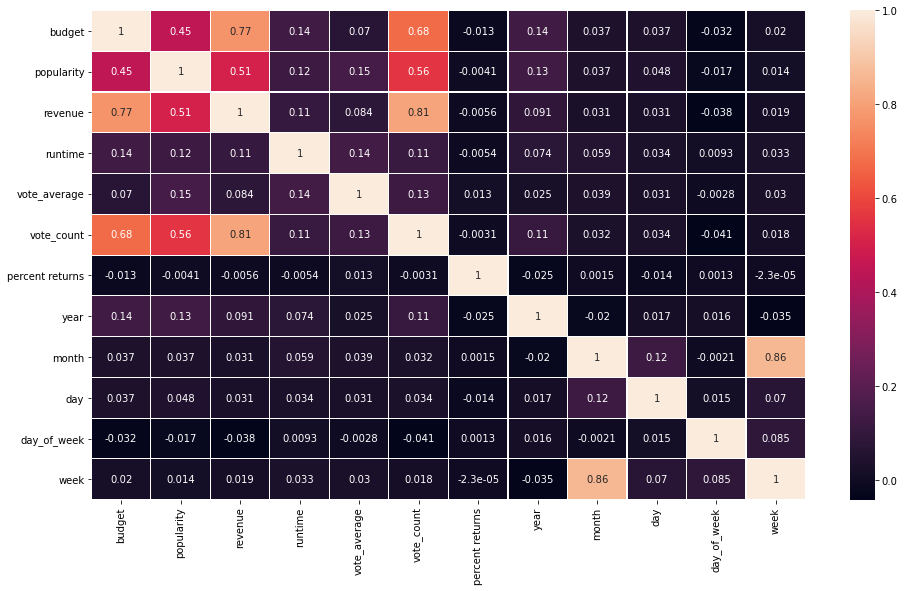

In [31]:
heatmap, ax = plt.subplots(figsize=(16, 9))
sns.heatmap(kaggleMovies.corr(), annot=True, linewidths = 0.1)

Lets cut down the heatmap to it's most important correlations for ease of viewing

As a note, the heatmap is mirrored across the diagonal filled with ones. This means that every box above or below the diagonal can be erased without losing any information.

<AxesSubplot:>

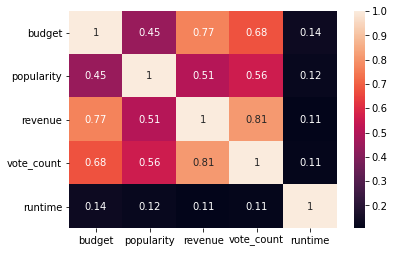

In [32]:
heatmapdb = kaggleMovies[['budget','popularity', 'revenue', 'vote_count','runtime']]
sns.heatmap(heatmapdb.corr(), annot = True, linewidths = 0)

I use the below configuration as a tool to display the correlation between two columns for every genre

Open up the resulting graph in a new window and zoom in

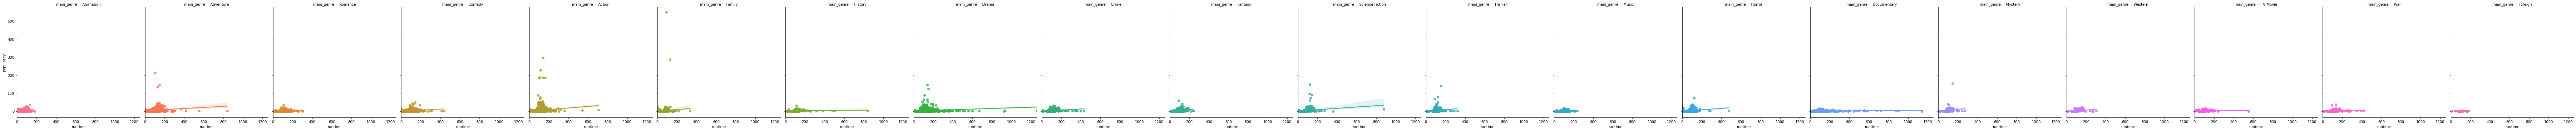

In [33]:
sns.lmplot(data = kaggleMovies
          , x = 'runtime'
          , y = 'popularity'
          , col = 'main_genre'
          , hue = 'main_genre'
          , truncate = True
          , )

Changed seaborn settings to match project style

In [34]:
sns.set_theme(style="darkgrid")
new_palette = ['#00B799']
sns.set_palette(new_palette)

So far, I have noticed that there is a strong correlation between the revenue and the general popularity of the movie. As the revenue increases, due to people buying tickets or home media, the amount of reviews increase, which in turn inspires more people to watch the movie. This is a vicious cycle that ends mainly due to the target audience being depleted. Advertising could punch up both the popularity and the revenue.

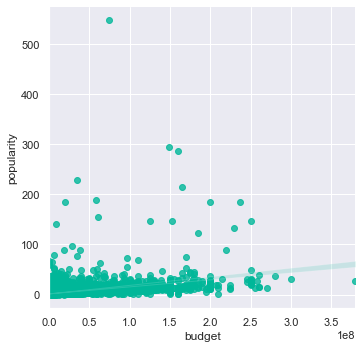

In [35]:
sns.lmplot(data = kaggleMovies,
          x = 'budget',
          y = 'popularity')
# Family
# Science Fiction
# Action

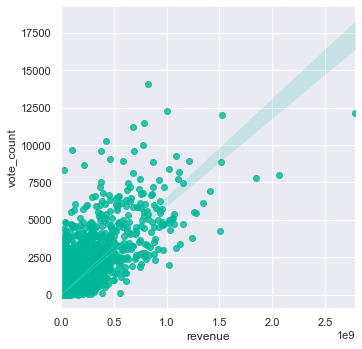

In [36]:
sns.lmplot(data = kaggleMovies,
          x = 'revenue',
          y = 'vote_count')
# Drama
# Science Fiction
# Action

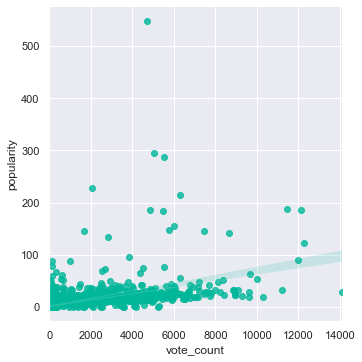

In [37]:
sns.lmplot(data = kaggleMovies,
          x = 'vote_count',
          y = 'popularity')
# Family
# Mystery
# Action

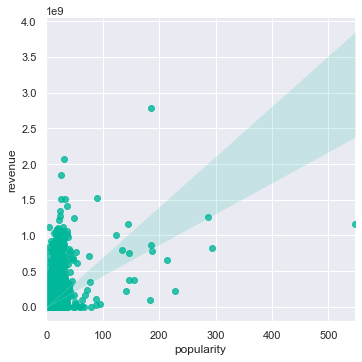

In [38]:
sns.lmplot(data = kaggleMovies,
          x = 'popularity',
          y = 'revenue')
# Adventure
# Action
# Family

I used the lmplot below the heatplot to find which genres have the highest correlation for each of the above four plots. The only genre in the top three of every plot is 'Action', so I will consider it the primary reccomended genre from the above.

Before we continue, I would like to find a litle information on runtime. Aulthough it's correlation is low, it is still above 10% which is no small contribution. Using the lmplot below the heatmap for this purpose, we see that movies longer that two hours do not have a large return, with that time period slightly extending the more serious the genre. Drama has the highest limit at 220 minutes, almost 4 hours. Documentaries appear to be the exception with no time limit, but suffer from the second lowest returns after the Foreign category.

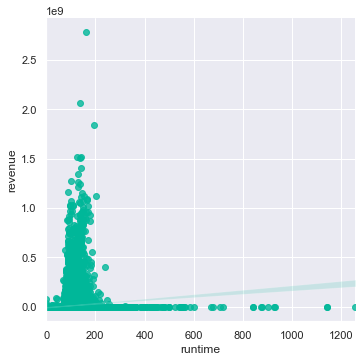

In [39]:
sns.lmplot(data = kaggleMovies,
          x = 'runtime',
          y = 'revenue')

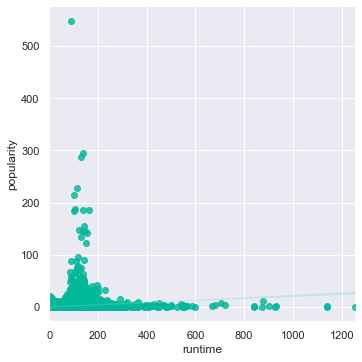

In [40]:
sns.lmplot(data = kaggleMovies,
          x = 'runtime',
          y = 'popularity')

# Business Recommendations

* Make **Action** and **Animated** movies a main part of your repertoire.
* For the above genres, releasing the films in the summer months (esp. May) is optimal.
* When choosing what types and how to go about making a given movie, use the movies with highest “bang for your buck” as a reference. (i.e Use "Despicable Me" as a reference for animated movies)


# Next Steps

* Difference between Box Office Mojo Data and tnMovieBudgets was substantial-- ultimately, we used Box Office Mojo because {}, but the top five genres were *different* when usingn tnMovieBudget data.
* Scraping marketing data would've been useful for Microsoft to consider *how* they should divvy up their production budget.
* Examining studio, producer, and actor popularity and/or ROI.